# Practice Session 08: Data streams

Author: <font color="blue">Shaoya Zhang</font>

E-mail: <font color="blue">shaoya.zhang01@estudiant.upf.edu</font>

Date: <font color="blue">2025-11-21</font>

In [1]:
import io
import nltk
import gzip
import random
import statistics
import secrets
import re
import gzip

# 0. Dataset and how to iterate

In [2]:
# LEAVE THIS CODE AS-IS

INPUT_FILE = "movie_lines.tsv.gz"

In [3]:
# LEAVE THIS CODE AS-IS

POS_NOUN = 'NN'
POS_VERB = 'VB'
POS_ADJECTIVE = 'JJ'

# Producer in Python that reads a file by words that are nouns
def read_by_parts_of_speech(filename, parts_of_speech, max_words=-1, report_every=-1):
    
    # Default value for report_every
    if report_every < 0 and max_words > 0:
        report_every = int(max_words/5)
    
    # Open the input file
    with gzip.open(INPUT_FILE, "rt", encoding='utf8') as file:
        
        # Initialize counter of words to stop at max_words
        counter = 0
    
        # Iterate through lines in the file
        for line in file:
            
            elements = line.split("\t")
            
            text = ""
            if len(elements) >= 5:
                text = elements[4].strip()
                                        
            if counter > max_words and max_words != -1:
                break
                
            for sentence in nltk.sent_tokenize(text):
                
                tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
                for word in [part[0] for part in tagged if part[1] in parts_of_speech]:
                
                    counter += 1

                    # Report
                    if (report_every != -1) and (counter % report_every == 0):
                        if max_words == -1:
                            print("- Read %d words so far" % (counter))
                        else:
                            print("- Read %d/%d words so far" % (counter, max_words))

                    # Produce the word in lowercase
                    yield word.lower()

In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zsy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\zsy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zsy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
# MODIFY THE max_words PARAMETER TO TAKE ABOUT 30 SECONDS TO DO THIS

# Maximum number of words to read, one pass should take about 30 seconds in your computer
MAX_WORDS = 40000

for word in read_by_parts_of_speech(INPUT_FILE, [POS_ADJECTIVE], max_words=MAX_WORDS):
    # Prints 1/1000 of words
    if random.random() < 0.001:
        print("Current noun '%s'" % (word)) 

Current noun 'little'
Current noun 'free'
Current noun 'false'
Current noun 'wish'
Current noun 'remarkable'
Current noun 'direct'
Current noun 'tasty'
Current noun 'old'
Current noun 'little'
Current noun 'dat'
Current noun 'lightstuff'
Current noun 'good'
- Read 8000/40000 words so far
Current noun 'single'
Current noun 'ready'
Current noun 'other'
Current noun 'tummy'
Current noun 'internal'
- Read 16000/40000 words so far
Current noun 'real'
Current noun 'dead'
Current noun 'ancient'
Current noun 'same'
Current noun 'last'
Current noun 'exact'
Current noun 'last'
Current noun 'unable'
Current noun 'deep'
Current noun 'black'
Current noun 'little'
Current noun 'forty-five'
- Read 24000/40000 words so far
Current noun 'bring-'
Current noun 'proud'
Current noun 'exact'
Current noun 'good'
Current noun 'medical'
- Read 32000/40000 words so far
Current noun 'sick'
Current noun 'enough'
Current noun 'good'
Current noun 'mixed'
Current noun 'real'
Current noun 'whole'
Current noun 'free'


# 1. Determine approximately the top-10 words

<font size="+1" color="red">Replace this cell with your code for "add_reservoir"</font>

In [6]:
def add_to_reservoir(reservoir, item, max_reservoir_size):
    # YOUR CODE HERE
    if len(reservoir) < max_reservoir_size:
        reservoir.append(item)
    else:
        idx = random.randint(0, max_reservoir_size - 1)
        reservoir[idx] = item
    assert(len(reservoir) <= max_reservoir_size)
    

<font size="+1" color="red">Replace this cell with your code for "reservoir_sampling"</font>

In [7]:
def reservoir_sampling(filename, part_of_speech, reservoir_size, max_words=-1, report_every=-1):
    reservoir = []
    words_read = 0
    for word in read_by_parts_of_speech(filename, part_of_speech, max_words=max_words, report_every=report_every):
            # YOUR CODE HERE
        words_read += 1
        if len(reservoir) < reservoir_size:
                add_to_reservoir(reservoir, word, reservoir_size)
        else:
                # if the probability falls in [0, s/n] we add the item to reservoir
                if random.random() < (reservoir_size / words_read):
                        add_to_reservoir(reservoir, word, reservoir_size)
    return (words_read, reservoir)

In [8]:
# LEAVE THIS CODE AS-IS

reservoir_size = 1500
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, [POS_VERB], reservoir_size, max_words=MAX_WORDS)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir) )

- Read 8000/40000 words so far
- Read 16000/40000 words so far
- Read 24000/40000 words so far
- Read 32000/40000 words so far
- Read 40000/40000 words so far
Number of items seen    : 40001
Number of items sampled : 1500


In [9]:
# Leave this code as-is

freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
for absolute_frequency, word in most_frequent_items:
    print("%d %s" % (absolute_frequency, word))

121 be
91 know
75 do
74 get
58 have
54 go
49 see
43 tell
40 let
30 think


<font size="+1" color="red">Replace this cell with your code to print the top items and their relative frequencies</font>

In [10]:
total_size = len(reservoir)
top_frequent_items = sorted([(frequency/total_size, word) for word, frequency in freq.items()], reverse=True)[:30]
for rel_freq, word in top_frequent_items:
    print(f"{rel_freq*100:.2f}%  {word}")

8.07%  be
6.07%  know
5.00%  do
4.93%  get
3.87%  have
3.60%  go
3.27%  see
2.87%  tell
2.67%  let
2.00%  think
1.87%  take
1.80%  make
1.67%  say
1.33%  want
1.27%  talk
1.27%  come
1.07%  call
1.00%  give
0.93%  like
0.93%  keep
0.87%  look
0.87%  kill
0.87%  help
0.80%  hold
0.80%  ask
0.73%  remember
0.73%  find
0.67%  mean
0.60%  put
0.60%  believe


<font size="+1" color="red">Increase the max limit of words so that one pass takes about 2-3 minutes to be completed. Replace this cell with your code to try different reservoir sizes. In each case, print your estimate for the relative and absolute frequency of the words in the entire dataset.</font>

In [11]:
from collections import Counter
# Auxliary function to get statisticas of reservoir
def reservoir_sampling_stats(reservoir, words_seen, top_count):
    freq = Counter(reservoir)
    total_size = len(reservoir)
    top_frequent_items = freq.most_common(top_count)
    for word, count in top_frequent_items:
        rel_freq = count / total_size        # reservoir relative frequency
        est_abs_freq = count * words_seen / total_size  # estimated absolute frequency of the dataset
        print(f"{word:15s} | reservoir freq: {count:4d} ({rel_freq:.4%}) | estimated dataset freq: {int(est_abs_freq)} ({est_abs_freq/words_seen:.4%})")
        

In [22]:

# Increase MAX_WORDS to 100,000
MAX_WORDS_INCREASED = 100000
reservoir_sizes = [500, 1000, 1500, 2000, 2500, 3000, 3500]

for r_size in reservoir_sizes:
    print(f"\n========= Reservoir size: {r_size} =========")
    # 1st run
    words_seen, reservoir = reservoir_sampling(INPUT_FILE, [POS_VERB], r_size, max_words=MAX_WORDS_INCREASED)
    print("Top 3 words and estimated frequencies 1st run:")
    
    # 2nd run
    reservoir_sampling_stats(reservoir, words_seen, 3)  
    print("Top 3 words and estimated frequencies 2nd run:")
    words_seen2, reservoir2 = reservoir_sampling(INPUT_FILE, [POS_VERB], r_size, max_words=MAX_WORDS_INCREASED)
    reservoir_sampling_stats(reservoir2, words_seen2, 3)  
        


========= Reservoir size: 500 =========
- Read 20000/100000 words so far
- Read 40000/100000 words so far
- Read 60000/100000 words so far
- Read 80000/100000 words so far
- Read 100000/100000 words so far
Top 3 words and estimated frequencies 1st run:
be              | reservoir freq:   40 (8.0000%) | estimated dataset freq: 8000 (8.0000%)
get             | reservoir freq:   29 (5.8000%) | estimated dataset freq: 5800 (5.8000%)
do              | reservoir freq:   25 (5.0000%) | estimated dataset freq: 5000 (5.0000%)
Top 3 words and estimated frequencies 2nd run:
- Read 20000/100000 words so far
- Read 40000/100000 words so far
- Read 60000/100000 words so far
- Read 80000/100000 words so far
- Read 100000/100000 words so far
be              | reservoir freq:   40 (8.0000%) | estimated dataset freq: 8000 (8.0000%)
get             | reservoir freq:   25 (5.0000%) | estimated dataset freq: 5000 (5.0000%)
do              | reservoir freq:   21 (4.2000%) | estimated dataset freq: 4200 (4.

<font size="+1" color="red">Replace this cell with a brief commentary indicating what reservoir size you would recommend to use, and your overall conclusions.</font>

#### Recommended Reservoir Size and Conclusions

After running the algorithm multiple times with different reservoir sizes, we observe that until a size of 2500, the algorithm yields an unstable results: the top-3 most frequent words change between two consecutive runs of the sampling process.

Starting from a reservoir size of approximately 2500, the top-3 words become more stable.

Therefore, we recommend using a reservoir size of at least 2500 conservatively, as it reliably captures the distribution of the dataset while still maintaining reasonable memory usage.

In conclusion, increasing reservoir size reduces sampling variance and improves the stability of the frequency estimates, which is expected given that a larger reservoir provides a more representative sample of the full data stream.

# 2. Determine approximately the distinct number of words

In [13]:
# LEAVE THIS CODE AS-IS

def count_trailing_zeroes(number):
    count = 0
    while number & 1 == 0:
        count += 1
        number = number >> 1
    return count

In [14]:
# LEAVE THIS CODE AS-IS

def random_hash_function():
    # We use a cryptographically safe generator for the salt of our hash function
    salt = secrets.token_bytes(32)
    return lambda string: hash(string + str(salt))

<font size="+1" color="red">Replace this cell with your code to perform the requested number of passes.</font>

In [15]:
# Auxiliar function to get userid
def read_userids(filename):
    with open(filename, encoding="utf8", errors="ignore") as f:
        for line in f:
            parts = line.split("\t")
            if len(parts) >= 2:
                yield parts[1]  # characterID

In [16]:
number_of_passes = 5
estimates = []

for i in range(number_of_passes):
    # YOUR_CODE_HERE: read the file and generate an estimate
    userids = read_userids(INPUT_FILE)
    max_trailing_zeros = 0
    hash_function = random_hash_function() # hash function for each pass
    
    for userid in userids:
        hash_val = hash_function(userid)
        num_zeros = count_trailing_zeroes(hash_val)
        max_trailing_zeros = max(max_trailing_zeros, num_zeros)
    estimate = 2 ** max_trailing_zeros
    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))

Estimate on pass 1: 65536 distinct words
Estimate on pass 2: 8192 distinct words
Estimate on pass 3: 32768 distinct words
Estimate on pass 4: 32768 distinct words
Estimate on pass 5: 8192 distinct words


In [17]:
# Leave this code as-is

print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

* Average of estimates: 29491.2
* Median  of estimates: 32768.0


<font size="+1" color="red">Compute the median of average estimates in 3 separate runs of your algorithm; each run should do 10 passes over the file. Repeat this for nouns (POS_NOUN), adjectives (POS_ADJECTIVE), and verbs (POS_VERB). Replace this cell with the results you obtained in each pass, and whether the average or the median seem more appropriate for this probabilistic counting.</font>

In [18]:
# I have reduced passes to 5, which the professor confirmed in forum and also because 10 passes takes too long time to run codes
# Run for NOUN
MAX_WORDS_INCREASED2 = 120000
run_avg_noun = []
for run in range(3):
    estimates_nuns = []
    for i in range(5):
        words = read_by_parts_of_speech(INPUT_FILE, POS_NOUN, MAX_WORDS_INCREASED2)
        hash_function = random_hash_function()
        max_trailing_zeros = 0
        
        for word in words:
            hash_val = hash_function(word)
            num_zeros = count_trailing_zeroes(hash_val)
            max_trailing_zeros = max(max_trailing_zeros, num_zeros)
        estimate = 2 ** max_trailing_zeros
        estimates_nuns.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    
    # Average of runs
    avg_estimate = sum(estimates_nuns) / len(estimates_nuns)
    run_avg_noun.append(avg_estimate)
    print(f"POS_NOUN | Run {run+1}: average of 5 passes = {avg_estimate}")
median_of_avgs = statistics.median(run_avg_noun)
print(f"POS_NOUN | Median of averages over 3 runs = {median_of_avgs}\n")

- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 1: 4096 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 2: 32768 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 3: 4096 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 4: 16384 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate

In [19]:
# Run for ADJ
run_avg_adj = []
for run in range(3):
    estimates_adj = []
    for i in range(5):
        words = read_by_parts_of_speech(INPUT_FILE, POS_ADJECTIVE, MAX_WORDS_INCREASED2)
        hash_function = random_hash_function()
        max_trailing_zeros = 0
        
        for word in words:
            hash_val = hash_function(word)
            num_zeros = count_trailing_zeroes(hash_val)
            max_trailing_zeros = max(max_trailing_zeros, num_zeros)
        estimate = 2 ** max_trailing_zeros
        estimates_adj.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    # Average of runs
    avg_estimate = sum(estimates_adj) / len(estimates_adj)
    run_avg_adj.append(avg_estimate)
    print(f"POS_ADJ | Run {run+1}: average of 5 passes = {avg_estimate}")
median_of_avgs_adj = statistics.median(run_avg_adj)
print(f"POS_ADJ | Median of averages over 3 runs = {median_of_avgs_adj}\n")

- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 1: 8192 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 2: 262144 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 3: 16384 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 4: 16384 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estima

In [20]:
# Run for VERB
run_avg_verb = []
for run in range(3):
    estimates_verb = []
    for i in range(5):
        words = read_by_parts_of_speech(INPUT_FILE, POS_VERB, MAX_WORDS_INCREASED2)
        hash_function = random_hash_function()
        max_trailing_zeros = 0
        
        for word in words:
            hash_val = hash_function(word)
            num_zeros = count_trailing_zeroes(hash_val)
            max_trailing_zeros = max(max_trailing_zeros, num_zeros)
        estimate = 2 ** max_trailing_zeros
        estimates_verb.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    
    # Average of runs
    avg_estimate = sum(estimates_verb) / len(estimates_verb)
    run_avg_verb.append(avg_estimate)
    print(f"POS_VERB | Run {run+1}: average of 5 passes = {avg_estimate}")
median_of_avgs_verb = statistics.median(run_avg_verb)
print(f"POS_VERB | Median of averages over 3 runs = {median_of_avgs_verb}\n")

- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 1: 2048 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 2: 2048 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 3: 65536 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate on pass 4: 4096 distinct words
- Read 24000/120000 words so far
- Read 48000/120000 words so far
- Read 72000/120000 words so far
- Read 96000/120000 words so far
- Read 120000/120000 words so far
Estimate 

#### Result & Conclusion
1. Result: <br>

POS_NOUN | Run 1: average of 5 passes = 14745.6<br>
POS_NOUN | Run 2: average of 5 passes = 6144.0<br>
POS_NOUN | Run 3: average of 5 passes = 111411.2<br>
POS_NOUN | Median of averages over 3 runs = 14745.6<br>


POS_ADJ | Run 1: average of 5 passes = 61030.4<br>
POS_ADJ | Run 2: average of 5 passes = 7372.8<br>
POS_ADJ | Run 3: average of 5 passes = 22528.0<br>
POS_ADJ | Median of averages over 3 runs = 22528.0<br>

POS_VERB | Run 1: average of 5 passes = 15155.2<br>
POS_VERB | Run 2: average of 5 passes = 7065.6<br>
POS_VERB | Run 3: average of 5 passes = 12697.6<br>
POS_VERB | Median of averages over 3 runs = 12697.6<br>

2. Conclusion:

Across the three runs, the averages of the estimated counts fluctuate significantly for all POS categories. Each run contains clear outliers (e.g., Run 3 for POS_NOUN, Run 1 for POS_ADJ, Run 1 for POS_VERB), which makes the simple average unstable. In contrast, the median of the three run-averages is much more consistent:<br>

* POS_NOUN median: 14745.6<br>

* POS_ADJ median: 22528.0<br>

* POS_VERB median: 12697.6<br>

Because reservoir sampling is probabilistic and individual runs can deviate due to randomness, the median provides a more robust estimate. Therefore, the median is more appropriate than the average for this counting method.


<font size="+2" color="red">Additional results: Heap's law</font>

- Read 1000/5000 words so far
- Read 2000/5000 words so far
- Read 3000/5000 words so far
- Read 4000/5000 words so far
- Read 5000/5000 words so far
POS=NN, max_words=5001, estimated distinct=2048
- Read 2000/10000 words so far
- Read 4000/10000 words so far
- Read 6000/10000 words so far
- Read 8000/10000 words so far
- Read 10000/10000 words so far
POS=NN, max_words=10001, estimated distinct=2048
- Read 3000/15000 words so far
- Read 6000/15000 words so far
- Read 9000/15000 words so far
- Read 12000/15000 words so far
- Read 15000/15000 words so far
POS=NN, max_words=15005, estimated distinct=4096
- Read 4000/20000 words so far
- Read 8000/20000 words so far
- Read 12000/20000 words so far
- Read 16000/20000 words so far
- Read 20000/20000 words so far
POS=NN, max_words=20001, estimated distinct=4096
- Read 6000/30000 words so far
- Read 12000/30000 words so far
- Read 18000/30000 words so far
- Read 24000/30000 words so far
- Read 30000/30000 words so far
POS=NN, max_words=30002, 

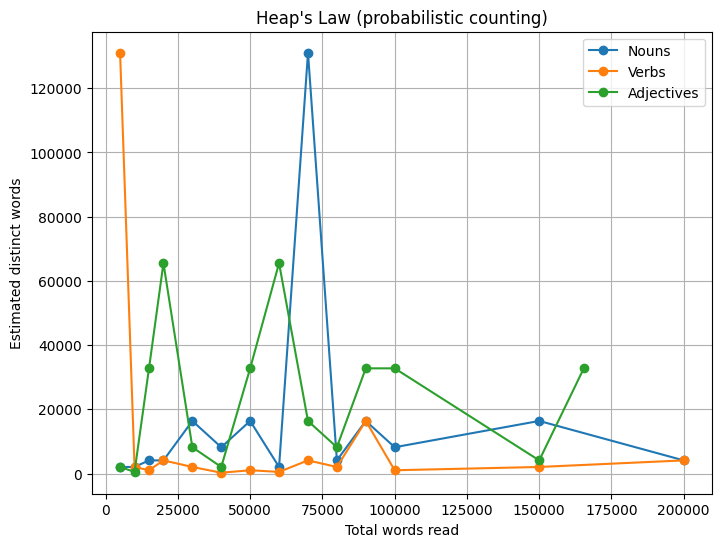

In [21]:
import matplotlib.pyplot as plt

def heaps_law_experiment(pos_tag, max_words_list):
    distinct_estimates = []

    for max_words in max_words_list:
        hash_function = random_hash_function()
        max_trailing_zeros = 0
        words_read_count = 0
        words_read = read_by_parts_of_speech(INPUT_FILE, pos_tag, max_words)

        for word in words_read:
            words_read_count += 1
            hash_val = hash_function(word)
            num_zeros = count_trailing_zeroes(hash_val)
            max_trailing_zeros = max(max_trailing_zeros, num_zeros)
            
        estimate = 2 ** max_trailing_zeros
        distinct_estimates.append((words_read_count, estimate))
        print(f"POS={pos_tag}, max_words={words_read_count}, estimated distinct={estimate}")

    return list(distinct_estimates)
    
max_words = [5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 150000, 200000]
# max_words = [5000, 10000, 30000]
pos_tags = {'Nouns': POS_NOUN, 'Verbs': POS_VERB, 'Adjectives': POS_ADJECTIVE}

# --- Experiment & Plot ---
plt.figure(figsize=(8,6))

for label, pos_tag in pos_tags.items():
    estimates = heaps_law_experiment(pos_tag, max_words)
    words, distinct = zip(*estimates)
    plt.plot(words, distinct, marker='o', label=label)

plt.xlabel("Total words read")
plt.ylabel("Estimated distinct words")
plt.title("Heap's Law (probabilistic counting)")
plt.legend()
plt.grid(True)
plt.show()

<font size="+2" color="#003300">I hereby declare that I completed this practice myself, that my answers were not written by an AI-enabled code assistant, and that except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>